In [ ]:
import torchaudio
import torch 
import pandas as pd
import numpy as np
import re 
import os 
from torch.nn import functional as F
import random
import math
import pickle
import gc
import torch.nn as nn
from tqdm.notebook import tqdm
import os
import glob
import warnings
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
warnings.filterwarnings(action='ignore')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc 
rc('font', family='malgun.ttf')
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
epochs = 150
batch_size = 32

if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')
print(DEVICE)

cuda


In [ ]:
tcae = pd.read_csv('tcae_charlie_embedding.csv')

In [ ]:
vocal = pd.read_csv('all.csv')['vocal']

In [ ]:
tcae.index = vocal

In [ ]:
!pip install umap-learn

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [ ]:
import umap

In [ ]:
reducer = umap.UMAP(n_components=2,random_state=64)

In [ ]:
tcae = reducer.fit_transform(tcae)

In [ ]:
tcae = pd.DataFrame(tcae, index = vocal)

In [ ]:
tcae = tcae.reset_index()

In [ ]:
tcae['singer'] = tcae['vocal'].apply(lambda x : x.split('/')[1].split('_')[0])

In [ ]:
tcae.singer.unique()

array(['이정', '버즈', '김광석', '소찬휘', '이적', '김연자', '김종국', '김예림', '박현빈', '거미',
       '윤하', '백아연', '김건모', '나윤권', '전인권', '이효리', '이선희', '권진아', '카더가든',
       '박진영', '양희은', '정동원', '바비 킴', '왁스', '더원', '잔나비', '임재범', '아이유',
       '식케이', '넬', '이은미', '케이시', '오왠', '태진아', '김연지', '정승환', '휘성', '윤종신',
       '김태우', '김창완', '정준일', '손승연', '하동균', '샘김', '서문탁', '박정현', '백지영',
       '아이비', '소향', '이찬원', '조용필', '이승환', '폴킴', '임영웅', '로이킴', '황치열', '김정민',
       '남진', 'XIA (준수)', '이수영', '헤이즈', '양파', '장재인', '에일리', '박완규', '김재환',
       '김현식', '제시', '안예은', '박재정', '자우림', '김호중', '백예린', '알리', 'JUNIEL',
       '보아', '송가인', '윤상', '임창정', '송하예', '윤미래', '이승철', '치즈', '제이', '송대관',
       '수란', '양다일', '김연우', '영탁', '린', '에릭남', '나얼', '이문세', 'KCM', '홍대광',
       '10CM', '박남정', '태연', '기리보이', '신해철', '엄정화', '이석훈', '김동률', '김범수',
       '케이윌', '비', '장범준', '현숙', '정인', '인순이', '김현철', '김현성', '지아', '박상민',
       '스텔라장', '루시드폴', '볼빨간사춘기', '윤도현', '별', '장나라', '박화요비', '장윤정', '한동근',
       '유승우', '김완선', '적재', '선우정아', '김조한', '이진아', '규현', '나비', '싸이'

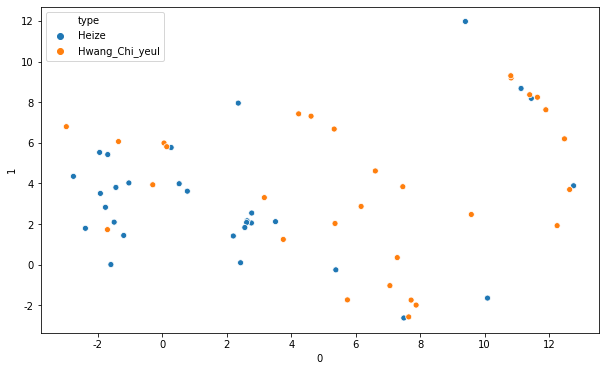

In [ ]:
tr = tcae[tcae['singer'].str.contains('헤이즈')]
ba = tcae[tcae['singer'].str.contains('황치열')]
tr['type'] = 'Heize'
ba['type'] = 'Hwang_Chi_yeul'

tb = pd.concat([tr,ba],axis =0)
tb = tb.set_index('vocal')

plt.figure(figsize=(10,6))
sns.scatterplot(x=0, y=1, hue="type" ,data=tb)
plt.legend(loc='upper left')
plt.show()

In [ ]:
# 헤이즈
tr[tr.loc[:,0]>11]

,vocal,0,1,singer,type
2738,Final_dataset/헤이즈_널 너무 모르고.wav,11.451758,8.187778,헤이즈,Heize
3340,Final_dataset/헤이즈_내가 더 나빠.wav,11.133436,8.675256,헤이즈,Heize
4141,Final_dataset/헤이즈_내 남자친구가 고맙대.wav,12.763347,3.884763,헤이즈,Heize


In [ ]:
# 황치열
ba[ba.loc[:,0]>11]

,vocal,0,1,singer,type
71,Final_dataset/황치열_사랑해 널 지우지도 못할만큼 (Unforgettab...,11.902219,7.625611,황치열,Hwang
1352,Final_dataset/황치열_어찌 잊으오.wav,12.252650,1.921747,황치열,Hwang
2479,Final_dataset/황치열_제목없음.wav,12.480186,6.194693,황치열,Hwang
3752,Final_dataset/황치열_사랑했다 미워했다 (I Loved You).wav,11.401151,8.365725,황치열,Hwang
3894,Final_dataset/황치열_행복해야해 (Please...).wav,11.641057,8.242781,황치열,Hwang
4177,Final_dataset/황치열_사랑.. 그 놈.wav,12.641076,3.698934,황치열,Hwang
